# Simple MNIST NN from scratch

In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

Here's a video I made explaining all the math and showing my progress as I coded the network: https://youtu.be/w8yWXqWQYmU

In [89]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('datasets/train.csv')
df_data = pd.DataFrame(data)

In [90]:
df_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
data = np.array(data)
m, n = data.shape
print(m, n)

42000 785


In [92]:
data.shape

(42000, 785)

In [93]:

np.random.shuffle(data) # shuffle before splitting into dev and training sets
df_data = pd.DataFrame(data)

data_dev = data[0:1000].T
df_data_dev = df_data[0:1000].T

Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255 #max value of X_dev arrays is 255 #max(X_dev[500])

In [94]:
X_dev.shape

(784, 1000)

In [95]:
df_data_dev.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,2,6,0,7,0,6,8,2,1,2,...,8,3,0,4,8,2,9,1,2,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
data_train = data[1000:m].T
df_data_train = data[1000:m].T

Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

_, m_train = X_train.shape

In [80]:
Y_train

array([2, 7, 6, ..., 6, 2, 5], dtype=int64)

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [81]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [82]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [87]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 1 1 ... 1 1 1] [2 7 6 ... 6 2 5]
0.061341463414634145
Iteration:  10
[1 1 3 ... 2 1 1] [2 7 6 ... 6 2 5]
0.13858536585365855
Iteration:  20
[2 1 3 ... 2 1 1] [2 7 6 ... 6 2 5]
0.19258536585365854
Iteration:  30
[2 1 3 ... 2 2 1] [2 7 6 ... 6 2 5]
0.2206829268292683
Iteration:  40
[2 7 3 ... 2 2 1] [2 7 6 ... 6 2 5]
0.26819512195121953
Iteration:  50
[2 7 7 ... 2 2 1] [2 7 6 ... 6 2 5]
0.3321707317073171
Iteration:  60
[2 7 7 ... 6 2 0] [2 7 6 ... 6 2 5]
0.38278048780487806
Iteration:  70
[2 7 6 ... 6 2 0] [2 7 6 ... 6 2 5]
0.4318292682926829
Iteration:  80
[2 7 6 ... 6 2 0] [2 7 6 ... 6 2 5]
0.47897560975609754
Iteration:  90
[2 7 6 ... 6 2 0] [2 7 6 ... 6 2 5]
0.5150487804878049
Iteration:  100
[2 7 4 ... 6 2 0] [2 7 6 ... 6 2 5]
0.5413658536585366
Iteration:  110
[2 7 4 ... 6 2 0] [2 7 6 ... 6 2 5]
0.5613414634146342
Iteration:  120
[2 7 6 ... 6 2 5] [2 7 6 ... 6 2 5]
0.5776585365853658
Iteration:  130
[2 7 6 ... 6 2 5] [2 7 6 ... 6 2 5]
0.5936585365853658
Iteration:

~85% accuracy on training set.

In [88]:
def make_predictions(X, W1, b1, W2, b2):
   #" Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X) "
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [2]
Label:  2


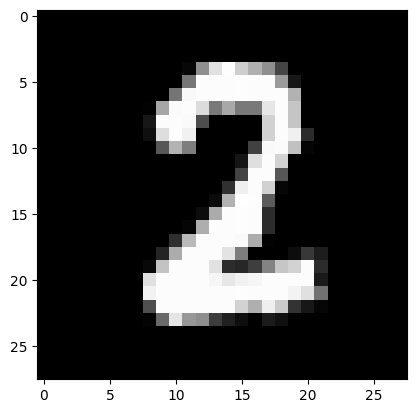

Prediction:  [9]
Label:  7


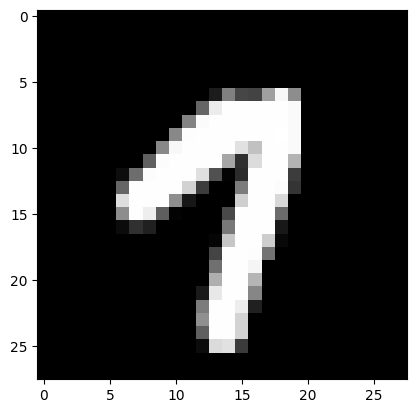

Prediction:  [6]
Label:  6


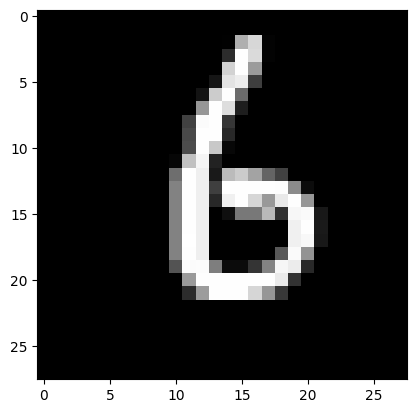

Prediction:  [7]
Label:  7


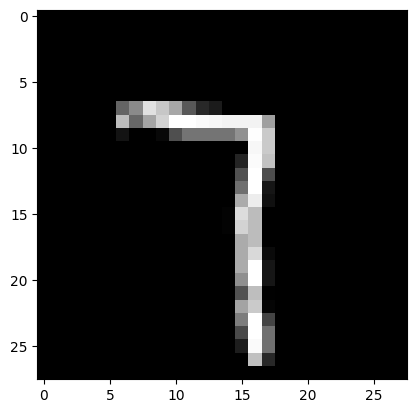

In [85]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [86]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 3 1 8 3 8 2 3 6 9 1 0 5 1 5 3 6 3 0 0 8 7 8 7 9 0 2 9 2 0 0 2 1 9 0 6 7
 8 1 1 6 6 1 8 1 5 0 0 1 2 7 3 3 7 5 3 7 3 9 2 7 3 2 3 1 1 7 8 3 8 6 7 3 0
 8 2 1 1 4 0 6 9 4 0 3 0 2 2 2 3 7 1 3 7 0 2 5 1 1 1 7 1 1 9 7 9 5 1 3 3 1
 9 5 0 6 7 8 5 9 5 8 8 0 8 5 3 3 4 8 7 8 0 3 3 7 2 5 4 3 8 1 4 7 4 9 6 4 3
 5 4 0 1 7 9 5 9 1 8 8 5 3 3 8 4 2 1 7 1 5 1 7 8 4 2 0 0 7 2 4 8 1 3 7 2 2
 4 5 5 0 0 0 0 4 3 3 4 6 3 0 7 6 6 6 7 2 4 1 8 1 7 4 5 9 5 6 7 3 3 6 0 6 8
 1 7 0 6 8 9 1 7 1 0 5 4 0 0 7 4 4 5 1 9 2 7 8 5 7 4 4 8 7 9 1 7 5 1 6 1 4
 3 0 2 2 3 5 9 5 8 9 9 4 5 9 8 3 1 8 3 3 6 6 3 1 6 0 4 3 0 8 8 1 9 6 0 1 2
 3 1 0 7 9 2 1 6 2 3 0 5 2 5 7 4 7 2 2 6 2 3 2 8 0 2 9 7 1 8 3 2 7 7 9 4 3
 2 6 4 5 3 4 0 6 0 2 4 3 6 0 0 7 7 7 8 5 8 2 2 8 0 9 8 4 8 3 7 0 7 3 7 6 3
 3 8 7 6 1 8 8 1 5 1 9 2 2 5 3 8 5 4 5 1 5 9 8 5 7 0 2 5 9 3 7 0 0 0 3 9 6
 3 8 8 0 6 0 3 6 2 6 3 8 4 1 2 4 6 0 3 7 1 2 1 3 0 9 6 5 0 8 1 8 7 7 9 2 3
 9 6 1 5 3 4 3 9 9 0 6 7 2 0 7 7 3 2 2 3 4 3 0 7 9 8 0 5 6 5 4 1 0 6 7 7 3
 7 7 6 3 9 4 3 8 8 9 2 7 

0.84

Still 84% accuracy, so our model generalized from the training data pretty well.